# Correlation Analysis

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sb


# Set the ggplot style (optional)
plt.style.use("ggplot")

In [15]:
# OJO que esto es para los estudiantes de matemáticas
df_por = pd.read_csv('student/student-por.csv', delimiter=';')
#df_por = pd.read_csv('student/student-por.csv', delimiter=';')

In [3]:
df_por.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [4]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df_por.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

**Basic cleaning or processing**

In the table above, some things seem weird. The minimum height is 1.63 and the maximum height is 364.0. Probably some fantasy figures, one apparently also with shoe size 88. This are typical issues we can quickly discover in a first inspection and then decide what to do about it. Here, we will simply decide to only take data within more or less realistic boundaries. 

**Question:** What does that actually mean?

Instead of as a matrix with values, the correlation matrix is often also graphically represented, especially for larger datasets, to easily spot particularly high and low coefficients.

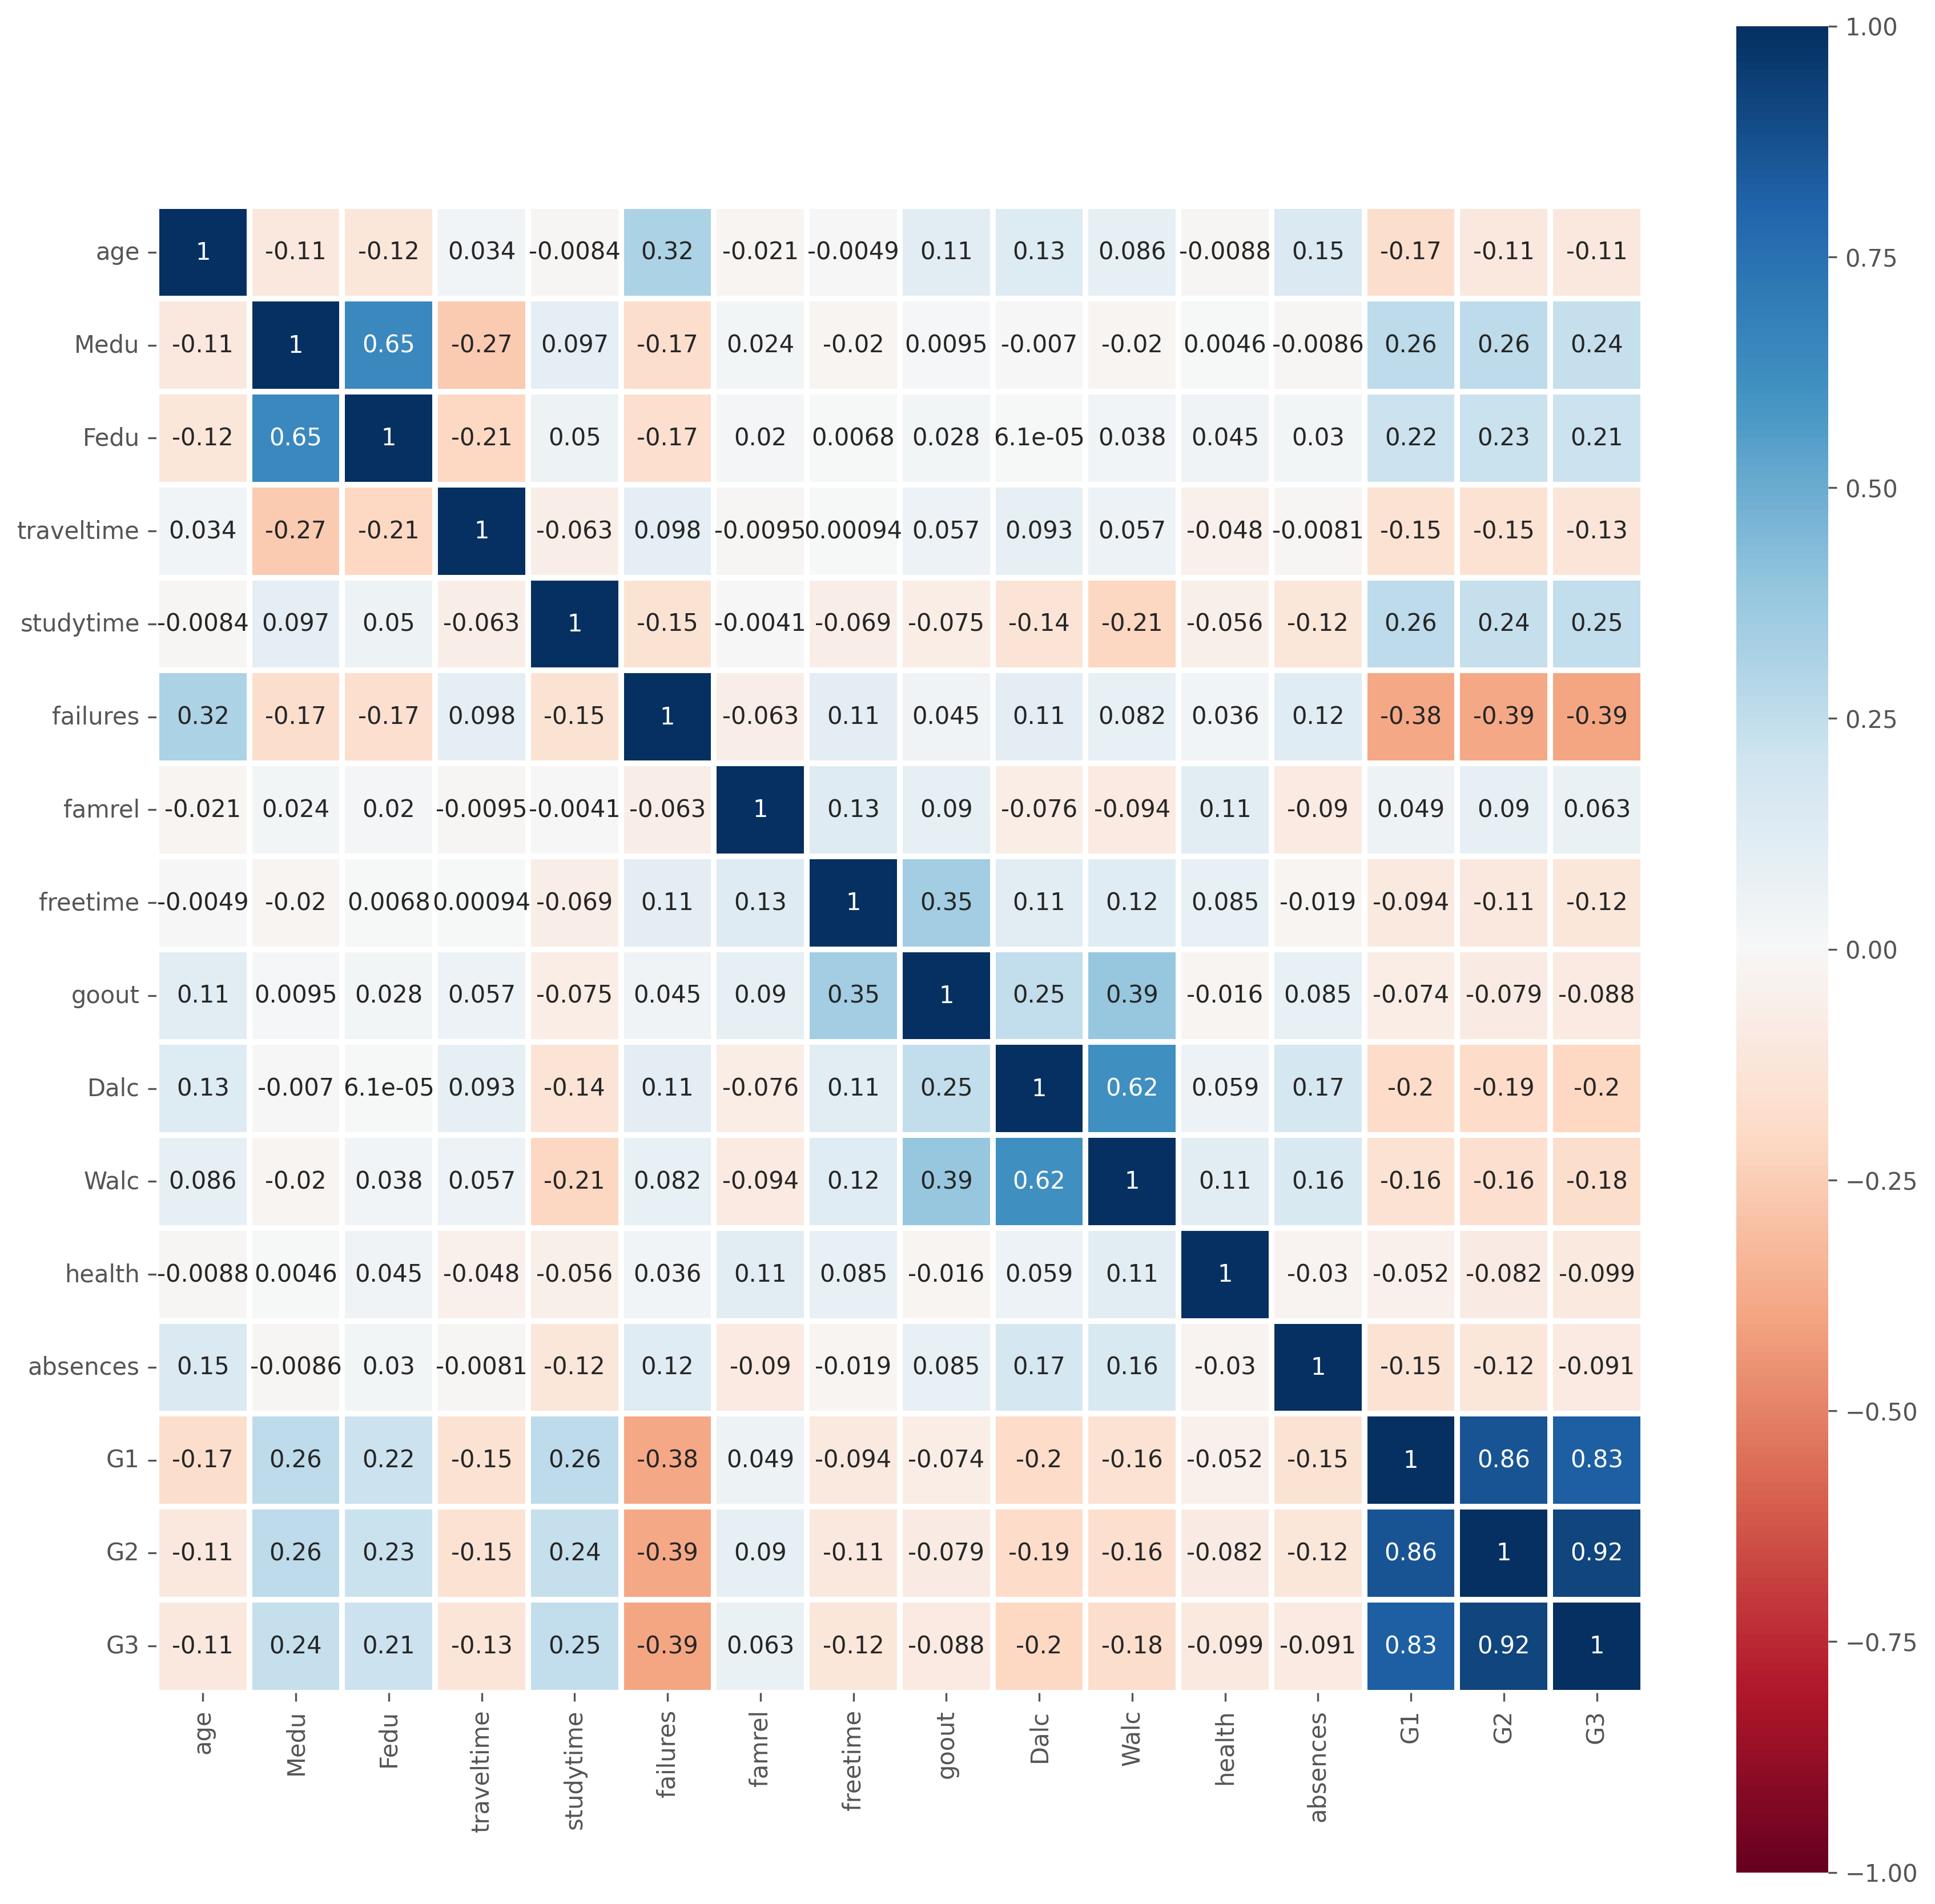

In [16]:
fig, ax = plt.subplots(figsize=(14, 14), dpi=300) 


sb.heatmap(
    df_por.corr(numeric_only=True), 
    vmin=-1, vmax=1,
    square=True, lw=2,
    annot=True, cmap="RdBu",
    ax=ax,
)
plt.show()

# PREPRACIÓN DEL DATASET

In [17]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sb


# Set the ggplot style (optional)
plt.style.use("ggplot")

In [18]:
df_por = pd.read_csv('student/student-por.csv', delimiter=';')

In [19]:
new_df_por = df_por.copy()

# Elimino G1 y G2 poque G3 es la media
new_df_por.drop(['G1', 'G2'], axis=1, inplace=True)

# Agrego el consumo de alcohol
new_df_por.drop(['Dalc', 'Walc'], axis=1, inplace=True)
new_df_por['Malcohol'] = (df_por['Walc'] + df_por['Dalc'])/2

# Agrego la formación paternal
new_df_por.drop(['Fedu', 'Medu'], axis=1, inplace=True)
new_df_por['Edu'] = df_por['Fedu'] + df_por['Medu']

df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [20]:
df_por = pd.get_dummies(df_por, drop_first=True)

# Seleccionamos todas las columnas (todas ahora son numéricas)
numeric_cols = df_por.select_dtypes(include=['float64', 'int64', 'bool']).columns

In [21]:
fig, ax = plt.subplots(figsize=(50, 50), dpi=300) 

sb.heatmap(
    df_por.corr(numeric_only=True), 
    vmin=-1, vmax=1,
    square=True, lw=2,
    annot=True, cmap="RdBu",
    ax=ax,
)
plt.show()

La librería Pingouin tiene una de las implementaciones más completas. Con la función corr() se obtiene, además del coeficiente de correlación, su significancia, intervalo de confianza y poder estadístico entre otros. Fuente: https://cienciadedatos.net/documentos/pystats05-correlacion-lineal-python

In [ ]:
!pip install pingouin

Interpretación de penguin
- r, la correlación 
- p-val indica si se debe a una casualidad (p-val>0.05) o puede ser significativa (p-val<0.05).
- CI es el intervalo de confianza, que estás 95% seguro de que el verdadero coeficiente de correlación de la población se encuentra entre X1 y X2
- BF10, factor de Bayes que indica la fuerza de la evidencia a favor de la hipótesis alternativa (que hay una correlación) frente a la hipótesis nula (que no hay correlación). Un valor tan alto (más de 10) sugiere una evidencia muy fuerte en favor de la hipótesis alternativa.
- power, indica la probabilidad de encontrar una relación si existe.

In [91]:
# Cálculo de correlación, significancia e intervalos con pingouin
# ==============================================================================
display(pg.corr(df_port['failures'], df_port['G3'], method='pearson'))
#display(pg.corr(df_port['failures'], df_port['G3'], method='spearman'))
#display(pg.corr(df_port['failures'], df_port['G3'], method='kendall'))

n         r           CI95%         p-val       BF10  power
pearson  395 -0.360415  [-0.44, -0.27]  1.465663e-13  4.114e+10    1.0

n         r           CI95%         p-val  power
spearman  395 -0.361224  [-0.44, -0.27]  1.281880e-13    1.0

n         r           CI95%         p-val     power
kendall  395 -0.299185  [-0.39, -0.21]  6.366094e-13  0.999984

In [115]:
# Crear una lista para almacenar los resultados
correlation_results = []

df_encoded = pd.get_dummies(df_port, drop_first=True)  # drop_first evita la multicolinealidad

# Seleccionamos todas las columnas (todas ahora son numéricas)
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64', 'bool']).columns


# Iterar sobre todas las columnas del DataFrame
for column in numeric_cols:
    if column not in ['G3']:  # Excluir 'G3' de la comparación
        # Calcular la correlación de Pearson entre 'failures' y la columna actual
        correlation = pg.corr(df_encoded['G3'], df_encoded[column], method='pearson')
        
        # Almacenar los resultados en la lista
        correlation_results.append({
            'Variable': column,
            'r': correlation['r'].values[0],
            'p-val': correlation['p-val'].values[0],
            'n': correlation['n'].values[0],
            'CI95': correlation['CI95%'].values[0].tolist()
        })
        
correlation_df = pd.DataFrame(correlation_results)

# Mostrar los resultados
display(correlation_df)

Variable         r          p-val    n            CI95
0                 age -0.161579   1.271439e-03  395  [-0.26, -0.06]
1                Medu  0.217147   1.336107e-05  395    [0.12, 0.31]
2                Fedu  0.152457   2.379973e-03  395    [0.05, 0.25]
3          traveltime -0.117142   1.986983e-02  395  [-0.21, -0.02]
4           studytime  0.097820   5.206115e-02  395    [-0.0, 0.19]
5            failures -0.360415   1.465663e-13  395  [-0.44, -0.27]
6              famrel  0.051363   3.085520e-01  395   [-0.05, 0.15]
7            freetime  0.011307   8.227402e-01  395   [-0.09, 0.11]
8               goout -0.132791   8.229000e-03  395  [-0.23, -0.03]
9                Dalc -0.054660   2.784915e-01  395   [-0.15, 0.04]
10               Walc -0.051939   3.031521e-01  395   [-0.15, 0.05]
11             health -0.061335   2.238770e-01  395   [-0.16, 0.04]
12           absences  0.034247   4.973318e-01  395   [-0.06, 0.13]
13                 G1  0.801468   9.001430e-90  395    [0.76, 0.83]
14                 G2  0.904868  7.625719e-148  395    [0.89, 0.92]
15          school_MS -0.045017   3.722262e-01  395   [-0.14, 0.05]
16              sex_M  0.103456   3.986533e-02  395      [0.0, 0.2]
17          address_U  0.105756   3.563268e-02  395     [0.01, 0.2]
18        famsize_LE3  0.081407   1.062048e-01  395   [-0.02, 0.18]
19          Pstatus_T -0.058009   2.500529e-01  395   [-0.16, 0.04]
20        Mjob_health  0.116158   2.093806e-02  395    [0.02, 0.21]
21         Mjob_other -0.096477   5.538492e-02  395    [-0.19, 0.0]
22      Mjob_services  0.078429   1.196603e-01  395   [-0.02, 0.18]
23       Mjob_teacher  0.057712   2.524869e-01  395   [-0.04, 0.16]
24        Fjob_health  0.057111   2.574760e-01  395   [-0.04, 0.15]
25         Fjob_other -0.053483   2.889844e-01  395   [-0.15, 0.05]
26      Fjob_services -0.016108   7.496182e-01  395   [-0.11, 0.08]
27       Fjob_teacher  0.095374   5.824720e-02  395    [-0.0, 0.19]
28        reason_home -0.021359   6.721434e-01  395   [-0.12, 0.08]
29       reason_other  0.052008   3.025150e-01  395   [-0.05, 0.15]
30  reason_reputation  0.095692   5.740940e-02  395    [-0.0, 0.19]
31    guardian_mother  0.022338   6.580534e-01  395   [-0.08, 0.12]
32     guardian_other -0.087774   8.145278e-02  395   [-0.18, 0.01]
33      schoolsup_yes -0.082788   1.003850e-01  395   [-0.18, 0.02]
34         famsup_yes -0.039157   4.377111e-01  395   [-0.14, 0.06]
35           paid_yes  0.101996   4.276506e-02  395      [0.0, 0.2]
36     activities_yes  0.016100   7.497403e-01  395   [-0.08, 0.11]
37        nursery_yes  0.051568   3.066276e-01  395   [-0.05, 0.15]
38         higher_yes  0.182465   2.668002e-04  395    [0.09, 0.28]
39       internet_yes  0.098483   5.048021e-02  395     [-0.0, 0.2]
40       romantic_yes -0.129970   9.712726e-03  395  [-0.23, -0.03]
41          color_red -0.770042   1.022947e-78  395  [-0.81, -0.73]

In [89]:
correlation_results = []

df_encoded = pd.get_dummies(df_port, drop_first=True)  # drop_first evita la multicolinealidad

# Seleccionamos todas las columnas (todas ahora son numéricas)
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64', 'bool']).columns

# Almacenamos los resultados en un DataFrame
correlation_results = []

# Iterar sobre cada columna numérica
for col in numeric_cols:
    if col != 'G3':  # Evitar calcular la correlación de G3 consigo mismo
        pearson_corr = pg.corr(df_encoded['G3'], df_encoded[col], method='pearson')
        spearman_corr = pg.corr(df_encoded['G3'], df_encoded[col], method='spearman')
        kendall_corr = pg.corr(df_encoded['G3'], df_encoded[col], method='kendall')
        
        # Guardar los resultados en una lista
        correlation_results.append({
            'Variable': col,
            'Pearson Correlation': pearson_corr['r'].values[0],
            'Pearson p-value': pearson_corr['p-val'].values[0],
            'Spearman Correlation': spearman_corr['r'].values[0],
            'Spearman p-value': spearman_corr['p-val'].values[0],
            'Kendall Correlation': kendall_corr['r'].values[0],
            'Kendall p-value': kendall_corr['p-val'].values[0],
        })

# Crear un DataFrame con los resultados
correlation_df = pd.DataFrame(correlation_results)

# Mostrar los resultados
display(correlation_df)

Variable  Pearson Correlation  Pearson p-value  \
0                 age            -0.161579     1.271439e-03   
1                Medu             0.217147     1.336107e-05   
2                Fedu             0.152457     2.379973e-03   
3          traveltime            -0.117142     1.986983e-02   
4           studytime             0.097820     5.206115e-02   
5            failures            -0.360415     1.465663e-13   
6              famrel             0.051363     3.085520e-01   
7            freetime             0.011307     8.227402e-01   
8               goout            -0.132791     8.229000e-03   
9                Dalc            -0.054660     2.784915e-01   
10               Walc            -0.051939     3.031521e-01   
11             health            -0.061335     2.238770e-01   
12           absences             0.034247     4.973318e-01   
13                 G1             0.801468     9.001430e-90   
14                 G2             0.904868    7.625719e-148   
15          school_MS            -0.045017     3.722262e-01   
16              sex_M             0.103456     3.986533e-02   
17          address_U             0.105756     3.563268e-02   
18        famsize_LE3             0.081407     1.062048e-01   
19          Pstatus_T            -0.058009     2.500529e-01   
20        Mjob_health             0.116158     2.093806e-02   
21         Mjob_other            -0.096477     5.538492e-02   
22      Mjob_services             0.078429     1.196603e-01   
23       Mjob_teacher             0.057712     2.524869e-01   
24        Fjob_health             0.057111     2.574760e-01   
25         Fjob_other            -0.053483     2.889844e-01   
26      Fjob_services            -0.016108     7.496182e-01   
27       Fjob_teacher             0.095374     5.824720e-02   
28        reason_home            -0.021359     6.721434e-01   
29       reason_other             0.052008     3.025150e-01   
30  reason_reputation             0.095692     5.740940e-02   
31    guardian_mother             0.022338     6.580534e-01   
32     guardian_other            -0.087774     8.145278e-02   
33      schoolsup_yes            -0.082788     1.003850e-01   
34         famsup_yes            -0.039157     4.377111e-01   
35           paid_yes             0.101996     4.276506e-02   
36     activities_yes             0.016100     7.497403e-01   
37        nursery_yes             0.051568     3.066276e-01   
38         higher_yes             0.182465     2.668002e-04   
39       internet_yes             0.098483     5.048021e-02   
40       romantic_yes            -0.129970     9.712726e-03   
41          color_red            -0.770042     1.022947e-78   

    Spearman Correlation  Spearman p-value  Kendall Correlation  \
0              -0.173438      5.354722e-04            -0.134471   
1               0.225036      6.290448e-06             0.174766   
2               0.170049      6.895636e-04             0.132405   
3              -0.120530      1.654591e-02            -0.098996   
4               0.105170      3.667358e-02             0.085112   
5              -0.361224      1.281880e-13            -0.299185   
6               0.054977      2.757107e-01             0.044007   
7              -0.004994      9.211901e-01            -0.003746   
8              -0.166119      9.192641e-04            -0.130110   
9              -0.120944      1.617510e-02            -0.097154   
10             -0.104459      3.797038e-02            -0.082838   
11             -0.047790      3.434712e-01            -0.036624   
12              0.017731      7.253626e-01             0.003723   
13              0.878001     8.141180e-128             0.746343   
14              0.957125     1.425342e-213             0.883518   
15             -0.064571      2.003349e-01            -0.054865   
16              0.103151      4.045595e-02             0.087646   
17              0.119457      1.754181e-02             0.101501   
18              0.066279      

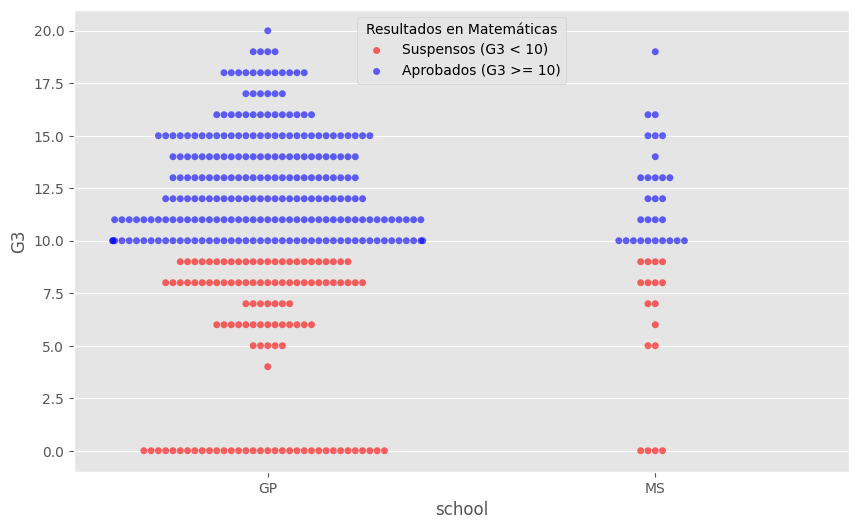

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [87]:
# Crear una columna en `df_portç` para categorizar los puntos según el valor de G3
df_por['color'] = df_por['G3'].apply(lambda x: 'red' if x < 10 else 'blue')

# Crear el gráfico de puntos (swarmplot) con la nueva columna de color como hue
plt.figure(figsize=(10, 6))
sb.swarmplot(y="G3", x="school", data=df_por, hue="color", palette={'red': 'red', 'blue': 'blue'}, alpha=0.6)

# Añadir etiquetas a los ejes
plt.xlabel("school")
plt.ylabel("G3")

# Ajustar la leyenda y mostrar la gráfica
plt.legend(title='Resultados en Matemáticas', labels=['Suspensos (G3 < 10)', 'Aprobados (G3 >= 10)'])
plt.show()
df_por.drop(columns=['color'])

color   Aprobados  Suspensos
school                      
GP            236        113
MS             29         17


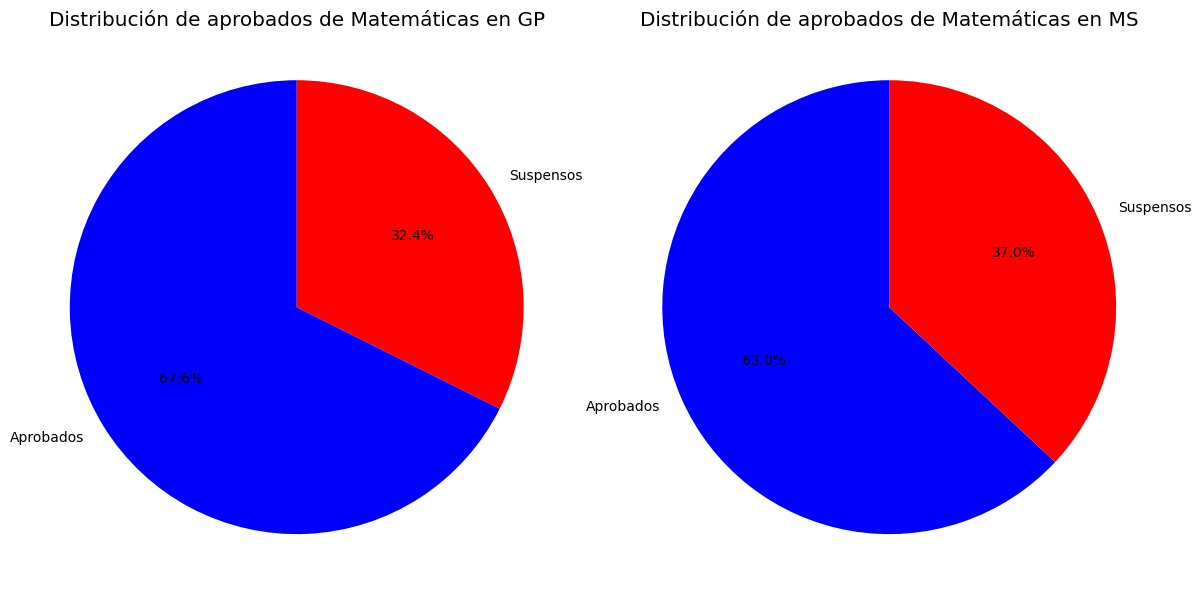

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Supongamos que df_por ya está definido y contiene la columna G3.

# Crear una columna en `df_por` para categorizar los puntos según el valor de G3
df_por['color'] = df_por['G3'].apply(lambda x: 'Suspensos' if x < 10 else 'Aprobados')

# Calcular la proporción de estudiantes en cada categoría agrupados por escuela
color_counts_by_school = df_por.groupby('school')['color'].value_counts().unstack()
print(color_counts_by_school)

# Crear gráficos de pastel para cada escuela
plt.figure(figsize=(12, 6))

for idx, school in enumerate(color_counts_by_school.index):
    plt.subplot(1, len(color_counts_by_school.index), idx + 1)  # Crear subgráficos
    plt.pie(color_counts_by_school.loc[school], labels=color_counts_by_school.columns, 
            colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de aprobados de Matemáticas en {school}')
    plt.axis('equal')

# Ajustar el diseño
plt.tight_layout()
plt.show()


/home/ccanamero/.pyenv/versions/3.11.0/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


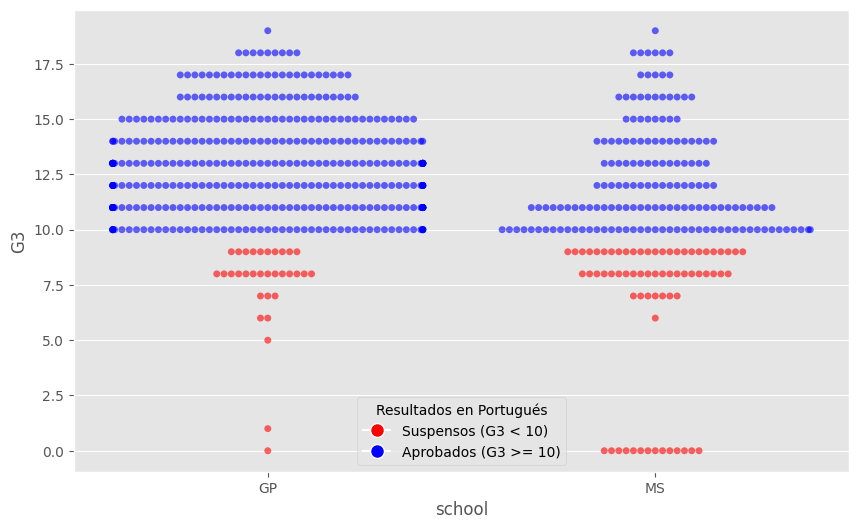

In [54]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Asegúrate de que 'df_por' es tu DataFrame y tiene la columna 'G3'
# Crear una columna en `df_por` para categorizar los puntos según el valor de G3
df_por['color'] = df_por['G3'].apply(lambda x: 'Suspenso' if x < 10 else 'Aprobado')

# Crear el gráfico de puntos (swarmplot) con la nueva columna de color como hue
plt.figure(figsize=(10, 6))
sb.swarmplot(y="G3", x="school", data=df_por, hue="color", palette={'Suspenso': 'red', 'Aprobado': 'blue'}, alpha=0.6)

# Añadir etiquetas a los ejes
plt.xlabel("school")
plt.ylabel("G3")

# Ajustar la leyenda
plt.legend(title='Resultados en Portugués', labels=['Suspensos (G3 < 10)', 'Aprobados (G3 >= 10)'], 
           handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)])

plt.show()



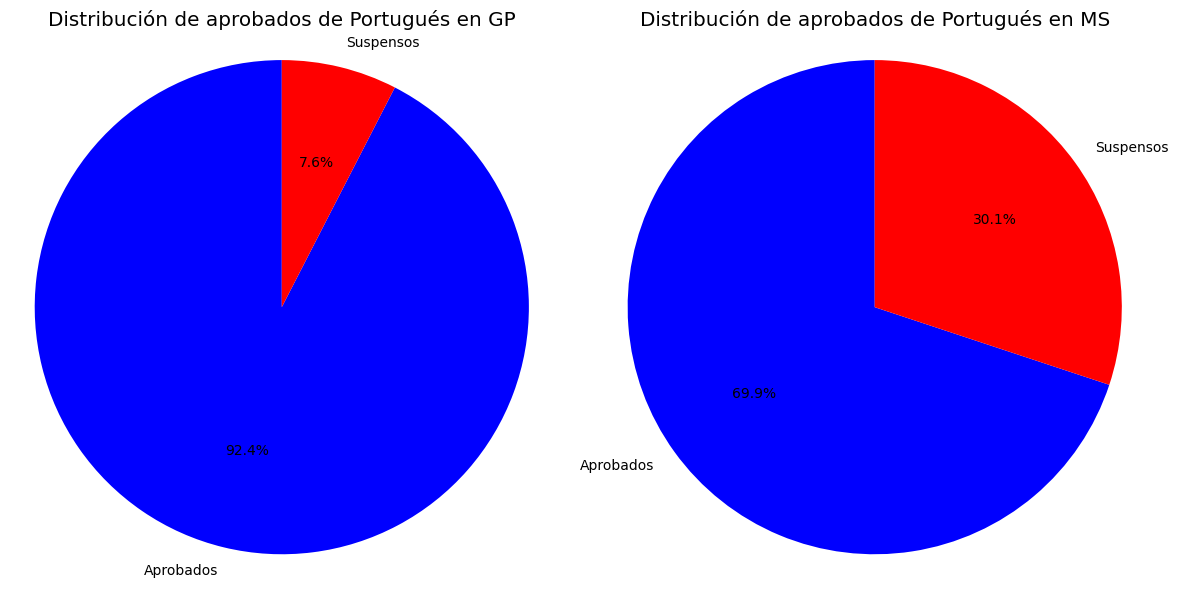

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Supongamos que df_por ya está definido y contiene la columna G3.

# Crear una columna en `df_por` para categorizar los puntos según el valor de G3
df_por['color'] = df_por['G3'].apply(lambda x: 'Suspensos' if x < 10 else 'Aprobados')

# Calcular la proporción de estudiantes en cada categoría agrupados por escuela
color_counts_by_school = df_por.groupby('school')['color'].value_counts().unstack()

# Crear gráficos de pastel para cada escuela
plt.figure(figsize=(12, 6))

for idx, school in enumerate(color_counts_by_school.index):
    plt.subplot(1, len(color_counts_by_school.index), idx + 1)  # Crear subgráficos
    plt.pie(color_counts_by_school.loc[school], labels=color_counts_by_school.columns,
            colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de aprobados de Portugués en {school}')
    plt.axis('equal')

# Ajustar el diseño
plt.tight_layout()
plt.show()